<a href="https://colab.research.google.com/github/Dharanidharan457/CODECRAFT_DS/blob/main/task05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-1-f37b50573aa1>:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Accident_Information.csv")


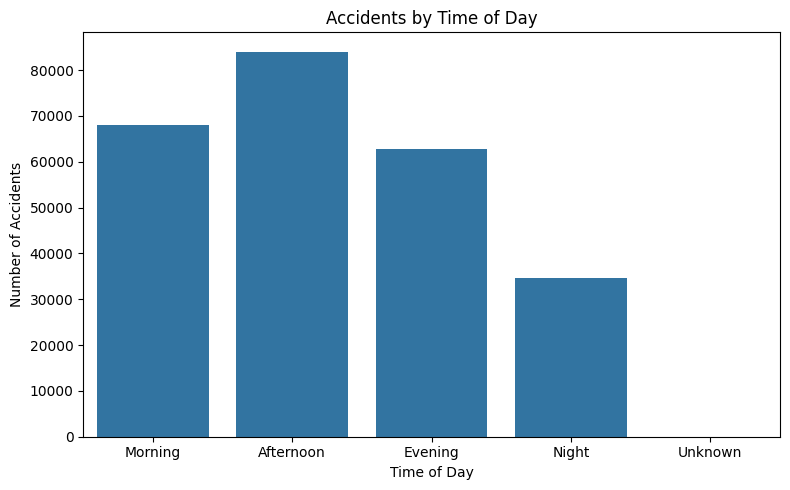

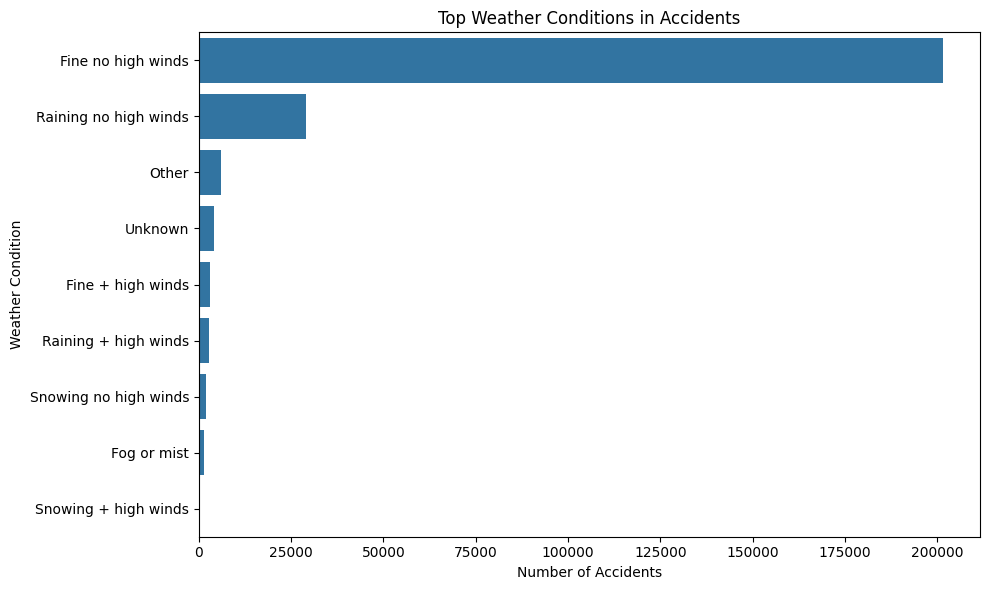

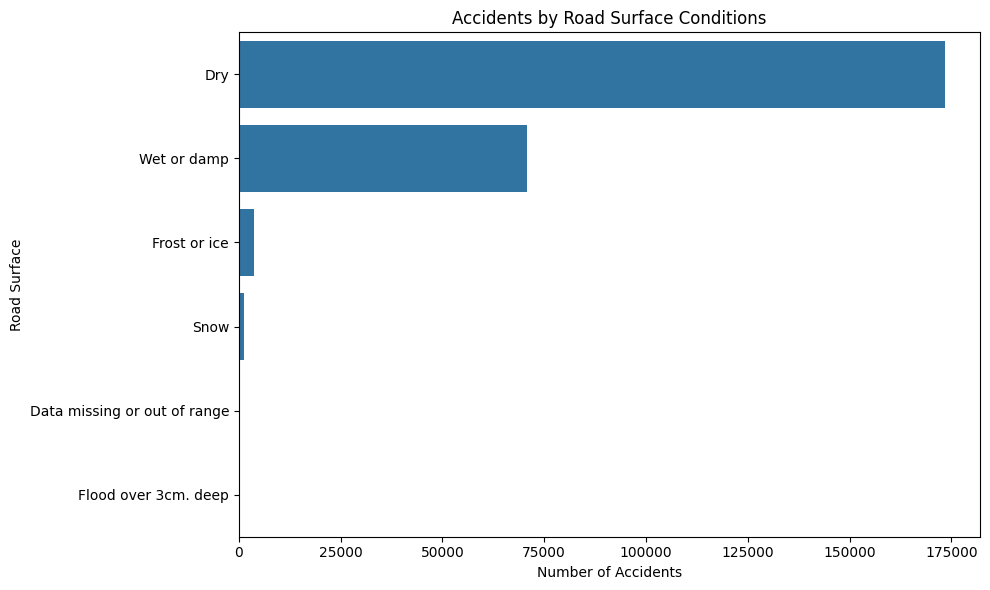

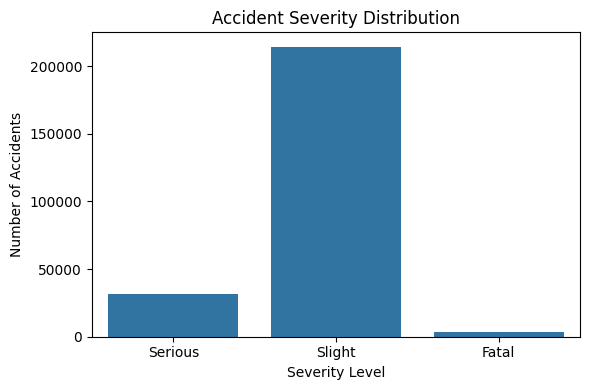

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# CSV
df = pd.read_csv("Accident_Information.csv")

df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
df['Hour'] = df['Datetime'].dt.hour
df['Day_of_Week'] = df['Day_of_Week'].astype(str)

# Define time of day
def time_of_day(hour):
    if pd.isna(hour):
        return "Unknown"
    elif 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df['TimeOfDay'] = df['Hour'].apply(time_of_day)

# Visualization
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='TimeOfDay', order=['Morning', 'Afternoon', 'Evening', 'Night', 'Unknown'])
plt.title("Accidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

# Accidents by Weather Conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Weather_Conditions', order=df['Weather_Conditions'].value_counts().index[:10])
plt.title("Top Weather Conditions in Accidents")
plt.xlabel("Number of Accidents")
plt.ylabel("Weather Condition")
plt.tight_layout()
plt.show()

# Accidents by Road Surface Conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Road_Surface_Conditions', order=df['Road_Surface_Conditions'].value_counts().index[:10])
plt.title("Accidents by Road Surface Conditions")
plt.xlabel("Number of Accidents")
plt.ylabel("Road Surface")
plt.tight_layout()
plt.show()

#Accident Severity Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Accident_Severity')
plt.title("Accident Severity Distribution")
plt.xlabel("Severity Level")
plt.ylabel("Number of Accidents")
plt.tight_layout()
plt.show()

#Heatmap of Accident Locations
df.dropna(subset=['Latitude', 'Longitude'], inplace=True)
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=10)
heat_data = df[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data).add_to(accident_map)

# Save map
accident_map.save("accident_hotspots_map.html")